In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
data = pd.read_csv('Customer Inquiry dataset.csv')
data.head()

,Ticket Type,2clean Ticket Description
0,Technical issue,billing zip code appreciate requested website ...
1,Technical issue,need change existing product im issue productp...
2,Technical issue,im facing problem productpurchased productpurc...
3,Billing inquiry,problem youre interested id love see happen pl...
4,Billing inquiry,note seller responsible damages arising delive...


In [244]:
from wordcloud import WordCloud
text = ' '.join(data['2clean Ticket Description'])
wordcloud = WordCloud(
    width=800, 
    height=400, 
    max_words=100,            # Max number of words to display
    background_color='white', # Background color
    colormap='viridis',       # Color map for words
       # Common words to exclude (e.g., "the", "and")
).generate(text)


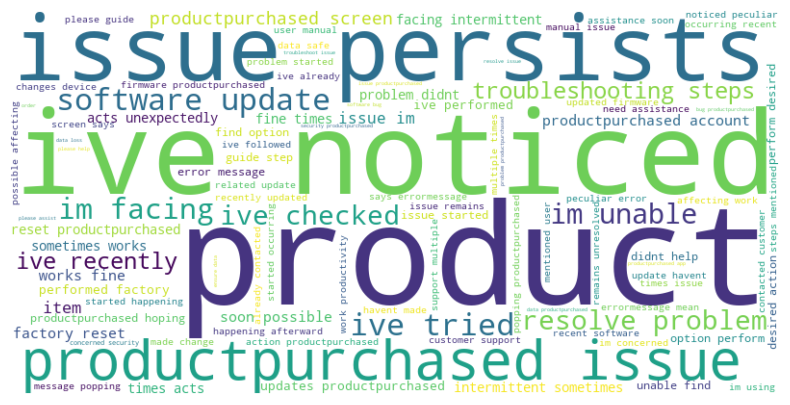

In [245]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [225]:
d1 = data[data['Ticket Type']=='Billing inquiry']
d2 = data[data['Ticket Type']=='Cancellation request']
d3 = data[data['Ticket Type']=='Product inquiry']
d4 = data[data['Ticket Type']=='Refund request']
d5 = data[data['Ticket Type']=='Technical issue']

sample = pd.concat([d1, d2, d3, d4, d5,d1, d2, d3, d4, d5])
sample.reset_index(drop=True,inplace=True)

In [226]:
sample.head()

,Ticket Type,2clean Ticket Description
0,Billing inquiry,problem youre interested id love see happen pl...
1,Billing inquiry,note seller responsible damages arising delive...
2,Billing inquiry,product name tpubask e kq join date oct posts ...
3,Billing inquiry,please note might already paid product means s...
4,Billing inquiry,im encountering software bug productpurchased ...


In [227]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Ticket Type                15910 non-null  object
 1   2clean Ticket Description  15910 non-null  object
dtypes: object(2)
memory usage: 248.7+ KB


In [228]:
sample.describe()

,Ticket Type,2clean Ticket Description
count,15910,15910
unique,5,7955
top,Refund request,problem youre interested id love see happen pl...
freq,3260,2


In [229]:
sample['Ticket Type'].value_counts()

Refund request          3260
Technical issue         3256
Cancellation request    3184
Product inquiry         3108
Billing inquiry         3102
Name: Ticket Type, dtype: int64

In [230]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [231]:
Y = encoder.fit_transform(sample['Ticket Type'])
encoder.classes_

array(['Billing inquiry', 'Cancellation request', 'Product inquiry',
       'Refund request', 'Technical issue'], dtype=object)

In [232]:
Y

array([0, 0, 0, ..., 4, 4, 4])

In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [234]:
vector = TfidfVectorizer(max_features=3000,ngram_range=(1,3))
X = vector.fit_transform(sample['2clean Ticket Description']).toarray()

In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [236]:
x_train.shape,y_train.shape

((12728, 3000), (12728,))

In [237]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,max_depth=60)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=60, n_estimators=200)

In [238]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [239]:
pred = model.predict(x_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))

0.8070395977372722
[[489  18  12  21  17]
 [ 35 511  35  34  35]
 [ 16  18 485  14  26]
 [ 48  31  47 551  33]
 [ 42  43  51  38 532]]


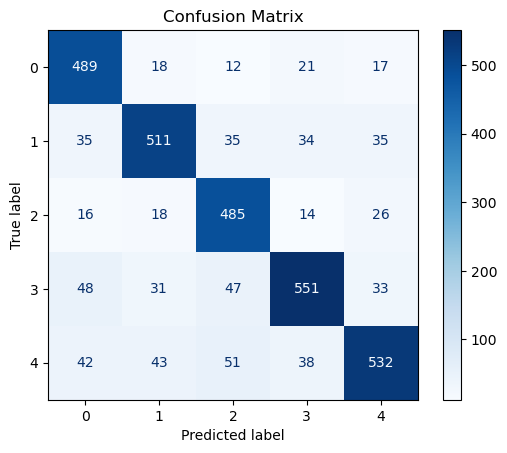

In [251]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(pred,y_test)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [210]:
category = {0:'Billing inquiry', 1:'Cancellation request', 2:'Product inquiry',
       3:'Refund request', 4:'Technical issue'}

In [211]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def text_cleaning(text):
    exclude = '!"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'
    pattern = text.translate(str.maketrans("","",exclude))
    pattern = re.sub('[^a-zA-Z]',' ',pattern)
    pattern = " ".join([word.lower() for word in pattern.split() if word.lower() not in stop_words])
    return pattern

In [212]:
def model_prediction(text):
    
    clean_text = text_cleaning(text)
    encode = vector.transform([clean_text]).toarray()
    pred = model.predict(encode)
    print(category[pred[0]])
    

In [246]:
text = "The payment page is not loading properly on my device"

In [247]:
model_prediction(text)

Refund request


In [2]:
import pickle

In [250]:
pickle.dump(vector,open('vector.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
pickle.dump(stop_words,open('stop_words.pkl','wb'))